<a href="https://colab.research.google.com/github/tankien76/CS232.K21/blob/master/Room1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/My Drive/room.zip" -d "dataset"

Archive:  /content/drive/My Drive/room.zip
   creating: dataset/images/
   creating: dataset/images/test/
  inflating: dataset/images/test/10766732.jpg  
  inflating: dataset/images/test/12565.jpg  
  inflating: dataset/images/test/1565746958348_20190830102545.jpg  
  inflating: dataset/images/test/247798426.jpg  
  inflating: dataset/images/test/3396435961_bc9556a544_b.jpg  
  inflating: dataset/images/test/3953592619926093576974855122884974596325376n-15346843088021536587365.jpg  
  inflating: dataset/images/test/444799fb20f054ebfcf4c5626a9290de.jpg  
  inflating: dataset/images/test/4827734249_55f1134693_b-1024x768.jpg  
  inflating: dataset/images/test/5567752525535788113425268526140699723169792n-15540862870331433347790-1554092266187729907585-1554200278009103069467-1554202516544242476290.jpg  
  inflating: dataset/images/test/AdobeStock_206009271.jpg  
  inflating: dataset/images/test/anh-3-1552467386-width660height880.jpg  
  inflating: dataset/images/test/Antes-y-después-de-cuarto

In [2]:
import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
test_dir="dataset/images/val"
train_dir="dataset/images/train"

train_dir_clean = train_dir + '/clean'
train_dir_messy = train_dir + '/messy'
test_dir_clean = test_dir + '/clean'
test_dir_messy = test_dir + '/messy'

In [6]:
print('number of clean training images - ',len(os.listdir(train_dir_clean)))
print('number of messy training images - ',len(os.listdir(train_dir_messy)))
print('number of clean testing images - ',len(os.listdir(test_dir_clean)))
print('number of messy testing images - ',len(os.listdir(test_dir_messy)))

number of clean training images -  160
number of messy training images -  169
number of clean testing images -  37
number of messy testing images -  32


In [7]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, 
                                    horizontal_flip=True, 
                                    rotation_range=15,
                                    zoom_range = 0.2)

In [8]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (100, 100),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (100, 100),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 329 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [9]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))

model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 126)       7

In [11]:
fitted_model = model.fit(training_data,
                        epochs = 25,
                        validation_data = testing_data)

Epoch 1/25
11/11 [==============================] - 10s 897ms/step - loss: 0.7204 - accuracy: 0.5046 - val_loss: 0.6940 - val_accuracy: 0.4638
Epoch 2/25
11/11 [==============================] - 9s 806ms/step - loss: 0.6952 - accuracy: 0.5228 - val_loss: 0.6929 - val_accuracy: 0.4638
Epoch 3/25
11/11 [==============================] - 9s 828ms/step - loss: 0.6914 - accuracy: 0.5167 - val_loss: 0.6882 - val_accuracy: 0.4638
Epoch 4/25
11/11 [==============================] - 9s 790ms/step - loss: 0.6754 - accuracy: 0.6049 - val_loss: 0.6444 - val_accuracy: 0.8261
Epoch 5/25
11/11 [==============================] - 9s 828ms/step - loss: 0.6390 - accuracy: 0.6079 - val_loss: 0.5284 - val_accuracy: 0.8696
Epoch 6/25
11/11 [==============================] - 9s 820ms/step - loss: 0.5723 - accuracy: 0.7112 - val_loss: 0.4013 - val_accuracy: 0.8841
Epoch 7/25
11/11 [==============================] - 9s 820ms/step - loss: 0.4996 - accuracy: 0.7629 - val_loss: 0.4060 - val_accuracy: 0.8406
Epoch

In [12]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (100, 100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    if result[0][0]  == 1:
        prediction = 'Clean'
    else:
        prediction = 'Messy'
    return prediction

In [13]:
test_path = []

for filename in os.listdir("dataset/images/test/"):
    test_path.append("dataset/images/test/" + filename)

print("Number of test images: ", len(test_path))

Number of test images:  24


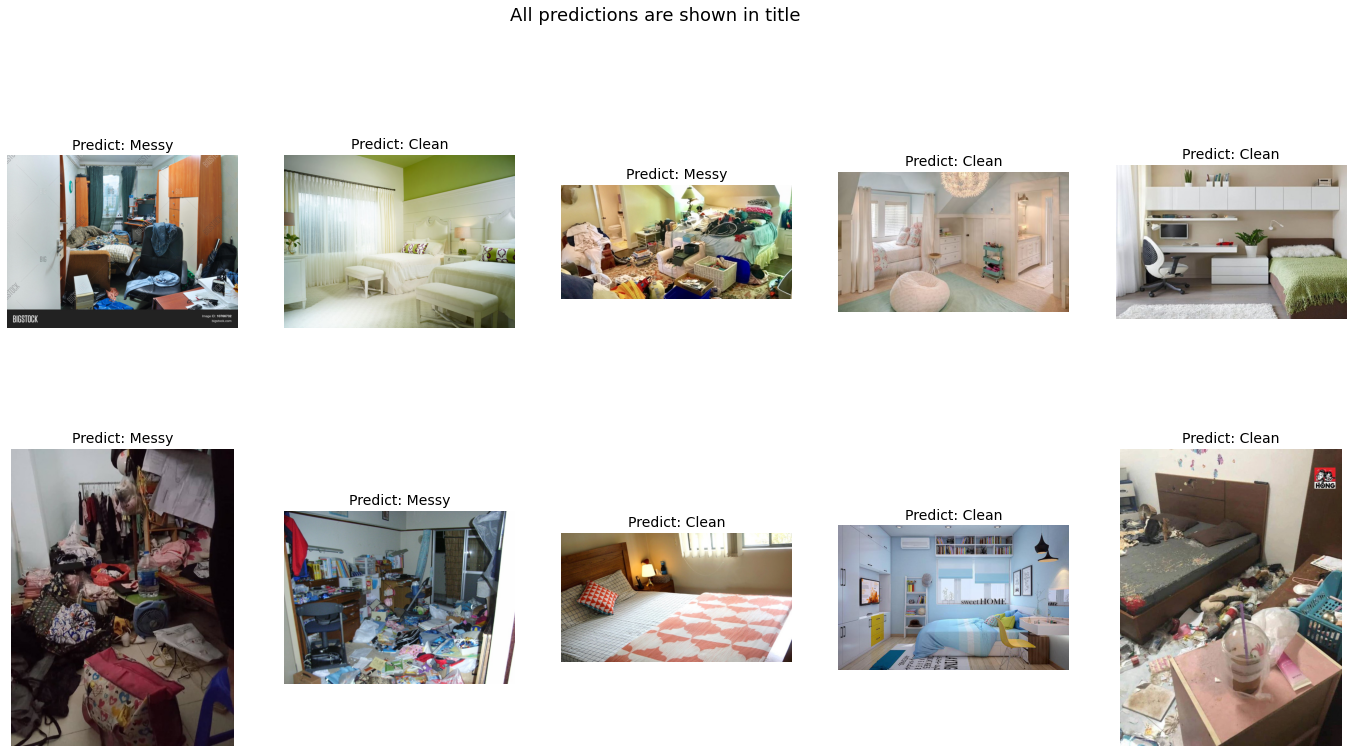

In [21]:
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=7
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_path[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
       
        txt = "Predict: {:.5}".format(testing_image(test_path[count]))
        
                
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt, fontsize = 14)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [17]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg


In [18]:
path1='/content/1.jpg'

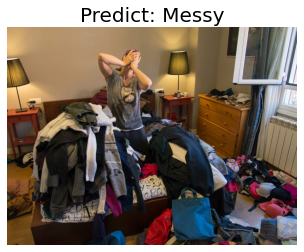

In [19]:
img1 = cv2.imread(path1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
txt = "Predict: {:.5}".format( testing_image(path1))

plt.imshow(img1)
plt.title(txt, fontsize = 20)
plt.axis('off')
plt.show()